In [3]:
import os
import re
import time
import datetime
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv(r'scraped_data\14-08-2025\popular_cars2_0216.csv')

In [5]:
df = df[df['mileage'].notnull()].drop(columns=['engine','transmission','fuel'])
df = df[df['year'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119213 entries, 0 to 126389
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   name      119213 non-null  object 
 1   link      119213 non-null  object 
 2   price     119213 non-null  int64  
 3   year      119213 non-null  float64
 4   mileage   119213 non-null  float64
 5   miles_pa  119213 non-null  int64  
 6   owners    119213 non-null  int64  
 7   distance  119213 non-null  int64  
 8   location  119173 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 9.1+ MB


In [6]:
df

,name,link,price,year,mileage,miles_pa,owners,distance,location
0,Peugeot 208,https://www.autotrader.co.uk/car-details/20250...,11600,2022.0,56334.0,18778,-1,-1,NaN
56,MG MG4,https://www.autotrader.co.uk/car-details/20250...,14700,2023.0,5075.0,2537,-1,-1,NaN
61,Citroen C3,https://www.autotrader.co.uk/car-details/20250...,2655,2014.0,55700.0,5063,-1,-1,NaN
84,Audi A3,https://www.autotrader.co.uk/car-details/20250...,5930,2014.0,76892.0,6990,-1,-1,NaN
138,Tesla Model Y,https://www.autotrader.co.uk/car-details/20250...,23400,2022.0,39509.0,13169,-1,-1,NaN
...,...,...,...,...,...,...,...,...,...
126385,Land Rover Discovery,https://www.autotrader.co.uk/car-details/20250...,29950,2018.0,64735.0,9247,-1,452,Muir Of Ord
126386,Land Rover Discovery,https://www.autotrader.co.uk/car-details/20250...,29950,2018.0,64735.0,9247,-1,452,Muir Of Ord
126387,Lexus RX,https://www.autotrader.co.uk/car-details/20240...,32550,2019.0,18000.0,3000,-1,457,Tain
126388,Lexus RX,https://www.autotrader.co.uk/car-details/20240...,32550,2019.0,18000.0,3000,-1,457,Tain


<Axes: xlabel='mileage', ylabel='price'>

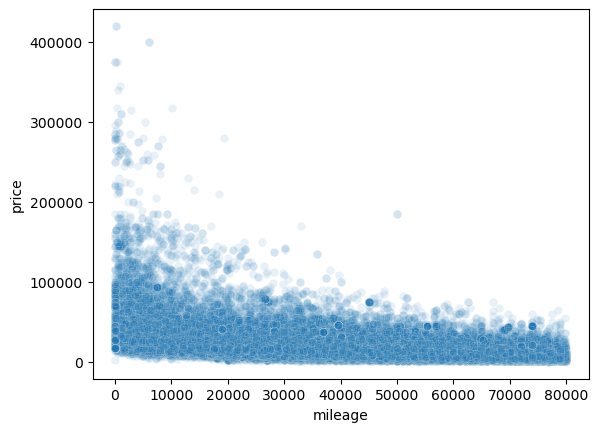

In [27]:
sns.scatterplot(data=df[df['mileage']<80000], x='mileage', y='price', alpha = 0.1)

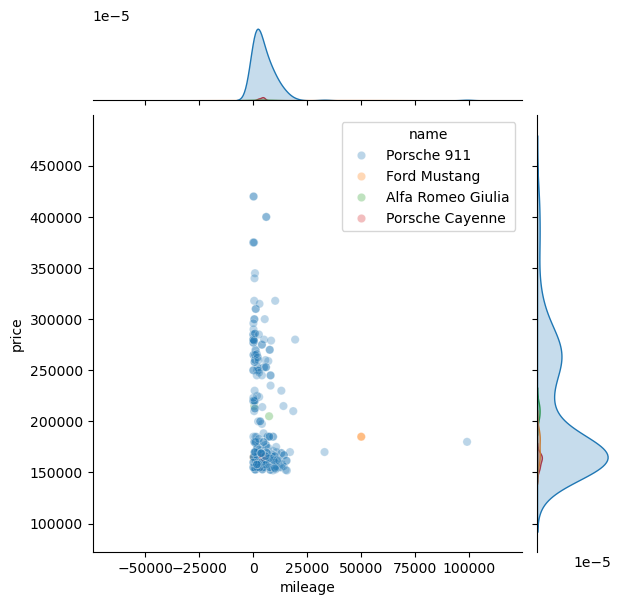

In [29]:
sns.jointplot(data=df[df['price']>150000], x="mileage", y="price", hue='name', joint_kws={'alpha':0.3})


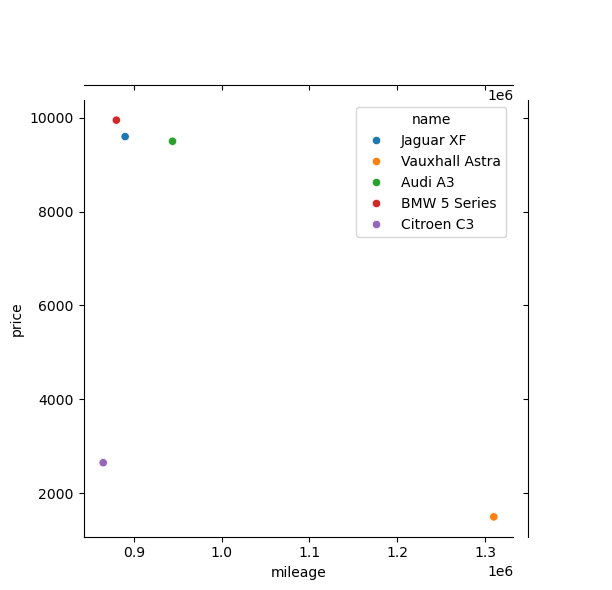

In [31]:
sns.jointplot(data=df[df['mileage']>700000], x="mileage", y="price", hue='name', joint_kws={'alpha':1})


In [37]:
df[df['mileage']>25000][df['price']>100000]

C:\Users\dille\AppData\Local\Temp\ipykernel_3836\458808691.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['mileage']>25000][df['price']>100000]


,name,link,price,year,mileage,miles_pa,owners,distance,location
10232,Porsche 911,https://www.autotrader.co.uk/car-details/20250...,111995,2018.0,28200.0,4028,-1,9,Richmond
23752,Porsche 911,https://www.autotrader.co.uk/car-details/20250...,110995,2010.0,29800.0,1986,-1,23,Marston
24132,Porsche 911,https://www.autotrader.co.uk/car-details/20250...,134995,2007.0,35800.0,1988,-1,23,Marston
24352,Porsche 911,https://www.autotrader.co.uk/car-details/20250...,139995,2006.0,30100.0,1584,-1,23,Marston
24458,Porsche 911,https://www.autotrader.co.uk/car-details/20250...,134995,2007.0,35800.0,1988,-1,23,Marston
31826,Porsche 911,https://www.autotrader.co.uk/car-details/20250...,129995,2007.0,106837.0,5935,-1,28,Horley
33534,Porsche 911,https://www.autotrader.co.uk/car-details/20250...,110000,2017.0,26851.0,3356,-1,30,Leighton Buzzard
39202,Porsche 911,https://www.autotrader.co.uk/car-details/20250...,114800,2017.0,38150.0,4768,-1,36,Milton Keynes
55061,Porsche 911,https://www.autotrader.co.uk/car-details/20241...,104995,2014.0,37500.0,3409,-1,49,Andover
55172,Porsche 911,https://www.autotrader.co.uk/car-details/20241...,104995,2014.0,37500.0,3409,-1,49,Andover
